In [1]:
import pandas as pd
pd.__version__

'1.4.2'

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import sklearn

In [4]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [5]:
df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet')
df.tpep_dropoff_datetime=pd.to_datetime(df.tpep_dropoff_datetime)
df.tpep_pickup_datetime=pd.to_datetime(df.tpep_pickup_datetime)
df['duration']=df.tpep_dropoff_datetime-df.tpep_pickup_datetime
df.duration=df.duration.apply(lambda td: td.total_seconds()/60)
df=df[(df.duration>=1)&(df.duration<=60)]
categorical=['PULocationID','DOLocationID']
numerical = ['trip_distance']
df[categorical]=df[categorical].astype(str)

In [12]:
df.duration.describe()

count    3.009173e+06
mean     1.420486e+01
std      9.939386e+00
min      1.000000e+00
25%      7.216667e+00
50%      1.155000e+01
75%      1.818333e+01
max      6.000000e+01
Name: duration, dtype: float64

In [15]:
train_dicts=df[categorical+numerical].to_dict(orient='records')
dv=DictVectorizer()
X_train=dv.fit_transform(train_dicts)
target='duration'
y_train=df[target].values
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_train)
mean_squared_error(y_train, y_pred, squared=False)

In [17]:
df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                     object
DOLocationID                     object
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
duration                        float64
dtype: object

In [18]:
X_train

<3009173x516 sparse matrix of type '<class 'numpy.float64'>'
	with 9027519 stored elements in Compressed Sparse Row format>

In [19]:
target='duration'
y_train=df[target].values

In [20]:
y_train

array([ 8.43333333,  6.31666667, 12.75      , ..., 24.51666667,
       13.        , 14.4       ])

In [21]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [22]:
y_pred=lr.predict(X_train)

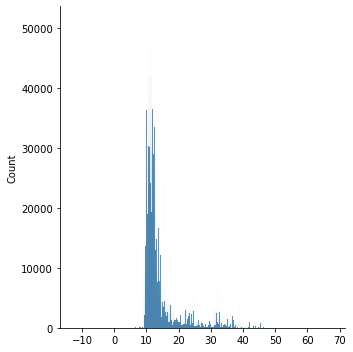

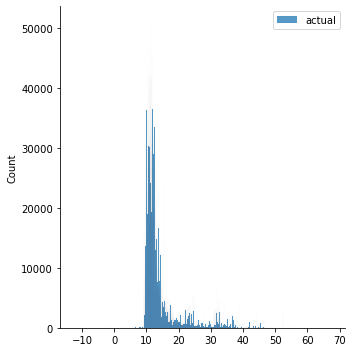

In [23]:
sns.displot(y_pred,label='prediction')
sns.displot(y_pred,label='actual')
plt.legend()

In [24]:
mean_squared_error(y_train, y_pred, squared=False)

7.649153585852299

In [26]:
def read_dataframe(filename):
    df = pd.read_parquet(filename)
    df.tpep_dropoff_datetime=pd.to_datetime(df.tpep_dropoff_datetime)
    df.tpep_pickup_datetime=pd.to_datetime(df.tpep_pickup_datetime)
    df['duration']=df.tpep_dropoff_datetime-df.tpep_pickup_datetime
    df.duration=df.duration.apply(lambda td: td.total_seconds()/60)
    df=df[(df.duration>=1)&(df.duration<=60)]
    categorical=['PULocationID','DOLocationID']

    df[categorical]=df[categorical].astype(str)

    return df

In [29]:
df_train=read_dataframe('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet')
df_val=read_dataframe('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet')

In [30]:
len(df_train),len(df_val)

(3009173, 2855951)

In [31]:
categorical=['PULocationID','DOLocationID']
numerical = ['trip_distance']

dv=DictVectorizer()
train_dicts=df_train[categorical+numerical].to_dict(orient='records')

X_train=dv.fit_transform(train_dicts)

val_dicts=df_val[categorical+numerical].to_dict(orient='records')
X_val=dv.transform(val_dicts)

In [32]:
target='duration'
y_train=df_train[target].values
y_val=df_val[target].values

In [34]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_val)
mean_squared_error(y_val, y_pred, squared=False)

7.8114192665332425

In [ ]:
target='duration'
y_train=df[target].values